In [11]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import joblib

In [12]:
submission = pd.read_csv("../src/submission.csv") 
test = pd.read_csv("../data/test.csv")
best_model = joblib.load("../models/best_model.pkl")

In [13]:
submission.head()

,Id,SalePrice
0,1461,125088.236388
1,1462,153090.137481
2,1463,177044.519444
3,1464,181067.270251
4,1465,188050.462393


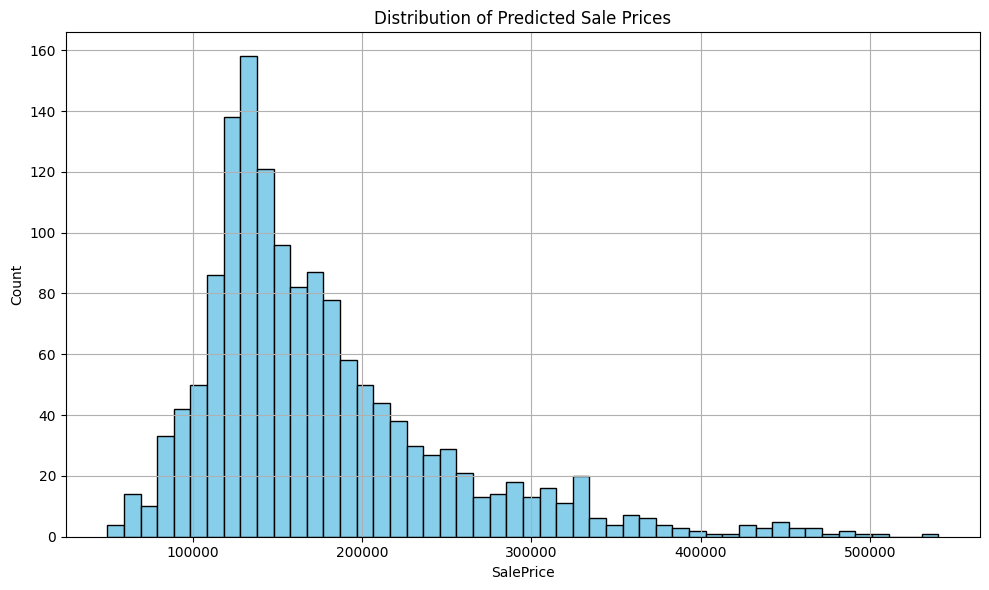

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(submission["SalePrice"], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Predicted Sale Prices")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

This shows the distribution of predicted sale prices for the test set.

Observations:

The distribution is slightly skewed right, similar to the training data.

The peak is centered between $120,000–$180,000, where most homes lie.

There's a drop-off in predictions for very high-priced homes, likely because fewer examples existed during training, or the log-transform compressed the range.

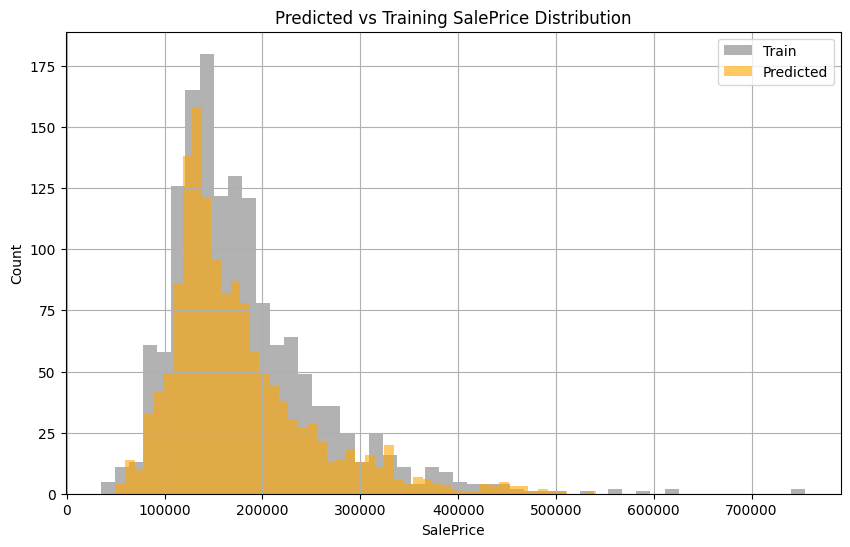

In [15]:
train = pd.read_csv("../data/train.csv")

plt.figure(figsize=(10, 6))
plt.hist(train["SalePrice"], bins=50, alpha=0.6, label="Train", color="gray")
plt.hist(submission["SalePrice"], bins=50, alpha=0.6, label="Predicted", color="orange")
plt.legend()
plt.title("Predicted vs Training SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.grid(True)
plt.show()

This histogram compares the distribution of predicted sale prices from the model to the actual sale prices in the training set.

Observations:

The overall shapes are similar, which represents that the model learned the distribution.

The predicted prices are slightly shifted left (lower) than the actual training prices which might suggest mild underestimation.

In [16]:
def summary_stats(series: pd.Series):
    return {
        "count": len(series),
        "mean": series.mean(),
        "median": series.median(),
        "min": series.min(),
        "max": series.max(),
    }

train_stats = summary_stats(train["SalePrice"])
pred_stats = summary_stats(submission["SalePrice"])

print("Training Data SalePrice Summary:")
print(train_stats)

print("\nPredicted SalePrice Summary:")
print(pred_stats)

Training Data SalePrice Summary:
{'count': 1460, 'mean': np.float64(180921.19589041095), 'median': np.float64(163000.0), 'min': np.int64(34900), 'max': np.int64(755000)}

Predicted SalePrice Summary:
{'count': 1459, 'mean': np.float64(175728.23543401566), 'median': np.float64(154513.5892683885), 'min': np.float64(49692.50190604324), 'max': np.float64(540461.9715608337)}


In [ ]:
importances = best_model.named_steps["model"].feature_importances_
feature_names = best_model.named_steps["preprocessor"].get_feature_names_out()
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})
feat_df = feat_df.sort_values(by="Importance", ascending=False).head(15)

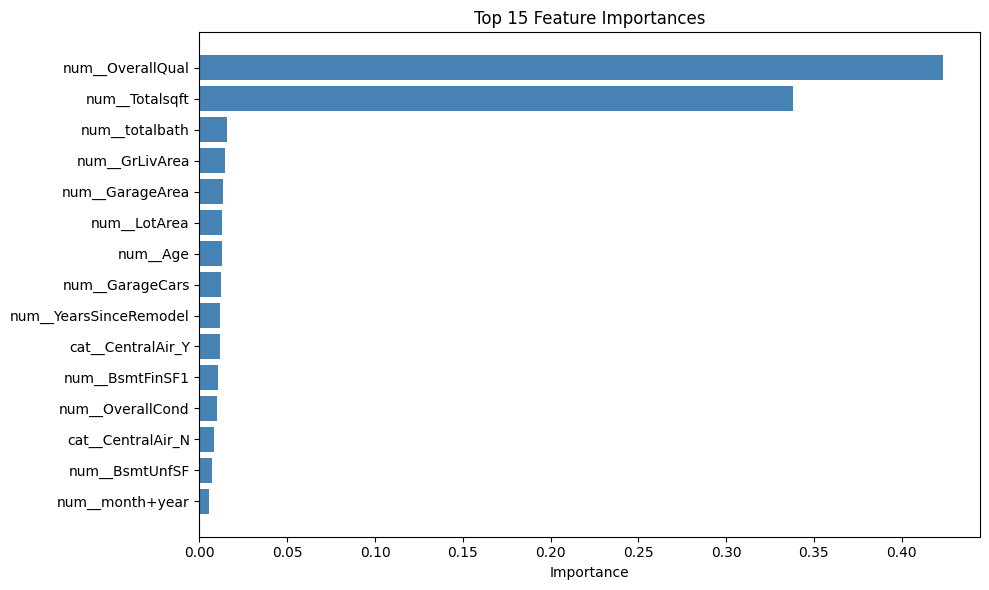

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feat_df["Feature"], feat_df["Importance"], color="steelblue")
plt.gca().invert_yaxis() 
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


The bar chart shows the top 15 most important features used by the Random Forest model. The top two features by a large margin are:

OverallQual: A quality rating of the house.

Totalsqft: A custom feature (combining basement, first floor, second floor and pool areas) that represents the total area of the home.

This aligns with real-world expectations that bigger, better-quality houses typically sell for more. Other relevant features include number of bathrooms, living room area, and garage space which makes sense in evaluating housing value.

# Summary
The model achieved an RMSE of 25627.081 and R² of 0.870, indicating strong overall performance with reasonable predictive power.

Important real-estate features were identified correctly (quality, square footage, bathrooms etc.).

Some bias may still exist toward the midrange of prices. Adding polynomial features or more advanced models (like XGBoost) could improve performance.

The predictions are consistent and follow expected trends, indicating the pipeline generalizes well to unseen data.